# S&DE Atelier: Visual Analytics 2022

Instructor: Marco D'Ambros (marco.dambros@usi.ch)

TA: Susanna Ardigò (susanna.ardigo@usi.ch)

## Assignment 2
Due 4 April 2022, 23.55

The datasets for the assignment are available here: https://drive.google.com/drive/folders/1gI501mWsqIH2YZ5Ml-fMqnZnWYxMRdJl?usp=sharing. To solve the assignment you should apply the knowledge you gained from the theoretical and practical lectures. In particular, when creating tabular or graphical representations you should apply the principles learned from theoretical lectures and use the technologies presented during practical lectures. Note that for creating the graphs you can use any of the libraries covered in class (```Bokeh```, ```Seaborn``` or ```Matplotlib```). You should submit a Jyputer notebook (named ```SurnameName_Assignment2.ipynb```) with your solutions and the steps followed to arrive to these solutions. Please follow the structure of the assignment to solve the exercises. 

### Exercise 1 - Used Cars dataset (30 points)


**Exercise 1.1**

Create a tabular representation of price ranges, per brand, year of registration (only consider the interval 1960-2020 and 4 create bins), and powerful/not powerful (above/below median powerPS of the entire dataset).
 
The table should have the different brands as rows, and powerful/not powerful, year of registration as hierarchical columns. The value of a cell represents the range of prices for the cars with brand identified by the row, interval of registration year and powerful/not powerful identified by the column.

An example table format is shown below:

<table>
    <tr>
        <th></th>
        <th colspan="3">Powerful</th> 
        <th></th>
        <th colspan="3">Not Powerful</th>
        <th></th>
  </tr>
    <tr>
    <th></th>
    <th>RB1</th>
    <th>RB2</th>
    <th>RB3</th>
    <th>RB4</th>
    <th>RB1</th>
    <th>RB2</th>
    <th>RB3</th>
    <th>RB4</th>
  </tr>
  <tr>
    <th>Audi</th>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
  </tr>
  <tr>
    <td colspan="5">...</td>
    <td colspan="4"> </td>
  </tr>
  <tr>
    <th>Skoda</th>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
   </tr>
</table>

RBn = Year of registration bin n
<br>
PR = Price range

First, let's import the cleaned dataset of the first assignment without the constraints on the price.

In [1]:
import pandas as pd

cars = pd.read_csv('used_cars_cleaned_dataset.csv')


In [2]:
cars.query("yearOfRegistration >= 1960 and yearOfRegistration <= 2020", inplace=True)
cars.yearOfRegistration.describe()

count    310708.000000
mean       2002.928940
std           6.588724
min        1960.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2018.000000
Name: yearOfRegistration, dtype: float64

In [3]:
power_median = cars.powerPS.median()
cars["Powerful"] = cars.powerPS > power_median
cars.powerPS.describe()

count    310708.000000
mean        123.102765
std         180.614304
min           0.000000
25%          75.000000
50%         112.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

In [4]:
cars.Powerful.value_counts()

False    155441
True     155267
Name: Powerful, dtype: int64

Now let's bin for the variable yearOfRegistration

In [5]:
n_bins = 4

bins = pd.cut(cars.yearOfRegistration, range(1960, 2021, (2021 - 1960) // n_bins ))
bins


0         (2005, 2020]
1         (1990, 2005]
2         (1990, 2005]
3         (2005, 2020]
4         (1990, 2005]
              ...     
311032    (1990, 2005]
311033    (1990, 2005]
311034    (1990, 2005]
311035    (1990, 2005]
311036    (2005, 2020]
Name: yearOfRegistration, Length: 310708, dtype: category
Categories (4, interval[int64, right]): [(1960, 1975] < (1975, 1990] < (1990, 2005] < (2005, 2020]]

In [6]:
def range_tuple(x1):
    return x1.min(), x1.max()

cars.pivot_table(index=["brand"], columns=["Powerful", bins], values="price", aggfunc=range_tuple, fill_value=0)

Powerful                     False                                 \
yearOfRegistration    (1960, 1975]    (1975, 1990]   (1990, 2005]   
brand                                                               
alfa_romeo           (5900, 73000)      (0, 18500)      (0, 7500)   
audi                    (0, 11990)      (0, 36000)     (0, 84911)   
bmw                     (0, 24750)      (0, 25500)  (0, 10000000)   
chevrolet               (0, 34900)      (0, 27999)     (0, 39900)   
chrysler              (3900, 6800)       (0, 8500)     (0, 11750)   
citroen              (1200, 36500)    (100, 22000)     (0, 33000)   
dacia                            0          (0, 0)      (0, 3500)   
daewoo                           0               0      (0, 3300)   
daihatsu                         0     (199, 3600)      (0, 8500)   
fiat                    (0, 23999)      (0, 25000)     (0, 19500)   
ford                 (0, 11111111)      (0, 39900)     (0, 17000)   
honda                (2250, 19000)      (0, 10000)     (0, 39900)   
hyundai                          0               0      (0, 4900)   
jaguar               (5900, 55000)   (9850, 34900)      (0, 5999)   
jeep                 (4670, 24900)    (900, 17900)      (0, 8500)   
kia                              0          (0, 0)     (0, 10000)   
lada                     (0, 5600)       (0, 9900)      (0, 7300)   
lancia               (5445, 22900)   (1450, 13500)     (0, 13900)   
land_rover           (6300, 32000)   (3000, 17990)   (550, 16800)   
mazda                            0      (0, 18200)     (0, 11500)   
mercedes_benz          (1, 188000)     (0, 179000)     (0, 89900)   
mini                 (4999, 24850)      (0, 30000)     (0, 18000)   
mitsubishi                       0       (0, 3999)     (0, 10500)   
nissan                           0    (100, 15000)     (0, 39900)   
opel                  (190, 27899)      (0, 24990)  (0, 12345678)   
peugeot              (1650, 23500)      (0, 16800)     (0, 11850)   
porsche              (180, 169000)  (2800, 254900)  (150, 270000)   
renault              (1100, 93000)       (0, 9500)     (0, 15699)   
rover                 (4300, 4300)   (2500, 10500)     (0, 24900)   
saab                             0       (0, 9950)      (0, 3999)   
seat                             0       (16, 999)      (0, 8500)   
skoda                (1200, 19500)    (250, 12600)      (0, 7800)   
smart                            0               0     (0, 40000)   
sonstige_autos         (0, 105000)      (0, 99999)   (0, 1600000)   
subaru              (10500, 10500)       (0, 3800)     (0, 14999)   
suzuki                           0       (0, 7500)    (0, 111111)   
toyota                (6000, 6000)      (0, 34900)    (0, 160000)   
trabant                 (0, 11800)      (0, 10500)   (750, 14500)   
volkswagen           (0, 99999999)   (0, 99999999)  (0, 12345678)   
volvo                (1499, 53000)      (0, 14950)     (0, 10500)   

Powerful                                     True                 \
yearOfRegistration   (2005, 2020]    (1960, 1975]   (1975, 1990]   
brand                                                              
alfa_romeo          (1500, 15499)      (0, 49999)     (0, 33000)   
audi                  (0, 323223)    (1400, 6000)     (0, 80000)   
bmw                    (0, 48950)   (5000, 42750)    (0, 599000)   
chevrolet              (0, 30000)   (1200, 65500)   (650, 24000)   
chrysler            (1500, 15750)   (2000, 37500)     (1, 12500)   
citroen                (0, 21900)  (15900, 27000)     (0, 11500)   
dacia                  (0, 19990)               0              0   
daewoo                (700, 2750)               0     (499, 499)   
daihatsu             (480, 12850)               0              0   
fiat                   (0, 23500)   (9900, 46990)  (2600, 39900)   
ford                  (0, 999999)  (2890, 120000)     (0, 44000)   
honda                  (0, 14900)               0    (850, 6000)   
hyundai     

**Exercise 1.2**

Create a dataframe with the 3 most frequent models for each brand

In [7]:
cars = pd.read_csv('used_cars_cleaned_dataset.csv')

def pick_3_most_frequent(s):
    # print(s.model.value_counts().sort_values(ascending=False))
    # s.model.value_counts().nlargest(3)
    return s.model.value_counts().nlargest(3).index.tolist()


grouped_brands = (cars.groupby(by="brand").apply(pick_3_most_frequent))

pd.DataFrame(grouped_brands).rename({0: '3 most frequent models'}, axis=1)

,3 most frequent models
brand,
alfa_romeo,"[156, andere, 147]"
audi,"[a4, a3, a6]"
bmw,"[3er, 5er, 1er]"
chevrolet,"[andere, matiz, captiva]"
chrysler,"[andere, voyager, ptcruiser]"
citroen,"[andere, berlingo, c3]"
dacia,"[logan, sandero, duster]"
daewoo,"[matiz, kalos, andere]"
daihatsu,"[cuore, sirion, andere]"


As we can notice, the brand sonstige_autos has an empty list as most frequent models, so let's explore why we have this behaviour

In [8]:
cars[cars.brand == "sonstige_autos"][["brand", "model"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2715 entries, 44 to 310995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   brand   2715 non-null   object
 1   model   0 non-null      object
dtypes: object(2)
memory usage: 63.6+ KB


All the models associated with the brand sonstige_autos are not provided, so we cannot determine which are the most frequent model for that type of brand. 

**Exercise 1.3**

Consider the price range 0 – 500’000 and the year of registration 1960 – 2020.
Split the price range in 10 bins and for each bin show the distribution of the year of registration. Show all the distribution in a single graph.

In [9]:
cars = pd.read_csv('used_cars_cleaned_dataset.csv')

cars.query("yearOfRegistration >= 1960 and yearOfRegistration <= 2020 and price >= 0 and price <= 500000", inplace=True)
cars["Bin"] = pd.cut(cars.price, 10)
cars.loc[:, ['yearOfRegistration', 'Bin']]

,yearOfRegistration,Bin
0,2011,"(-500.0, 50000.0]"
1,2004,"(-500.0, 50000.0]"
2,2001,"(-500.0, 50000.0]"
3,2008,"(-500.0, 50000.0]"
4,1995,"(-500.0, 50000.0]"
...,...,...
311032,2000,"(-500.0, 50000.0]"
311033,2000,"(-500.0, 50000.0]"
311034,1996,"(-500.0, 50000.0]"
311035,2002,"(-500.0, 50000.0]"


In order to show the distribution of the registration year we will plot the data with a boxplot. 

Text(0, 0.5, 'Price range')

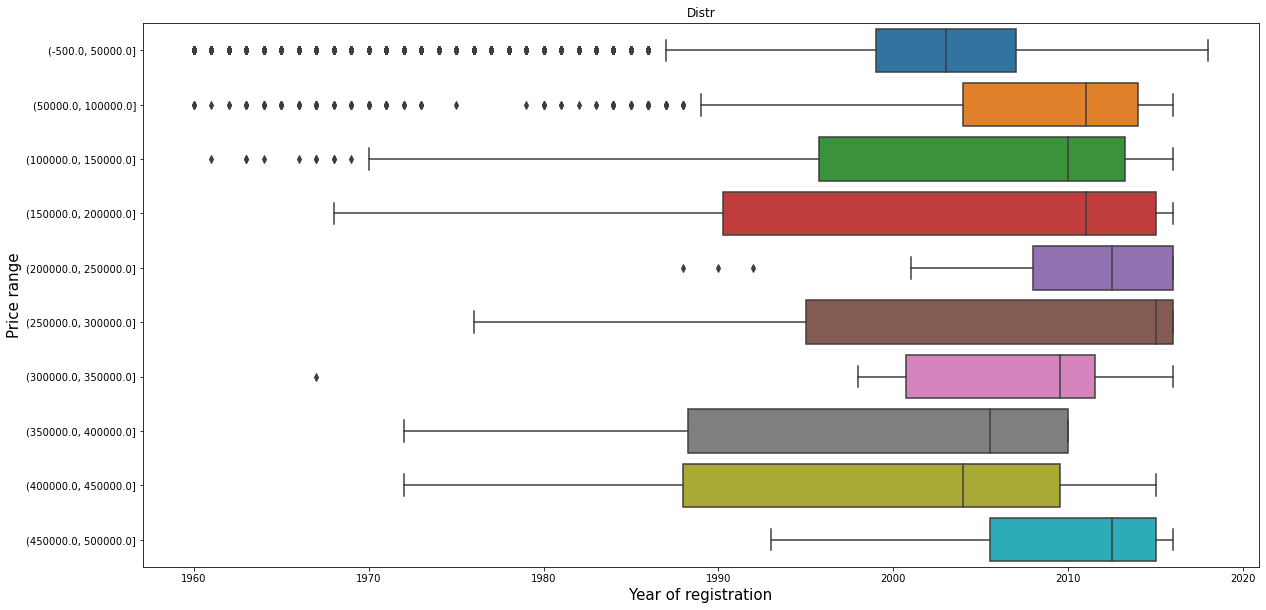

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt


plt.subplots(figsize=(20,10))
plt.title("Distr")
bp = sns.boxplot(x="yearOfRegistration", y="Bin", data=cars)

bp.set_xlabel("Year of registration", fontsize = 15)
bp.set_ylabel("Price range", fontsize = 15)


And to better understand the density of the data, we can plot the distribution with a density plot. 

Text(0, 0.5, 'Price range')

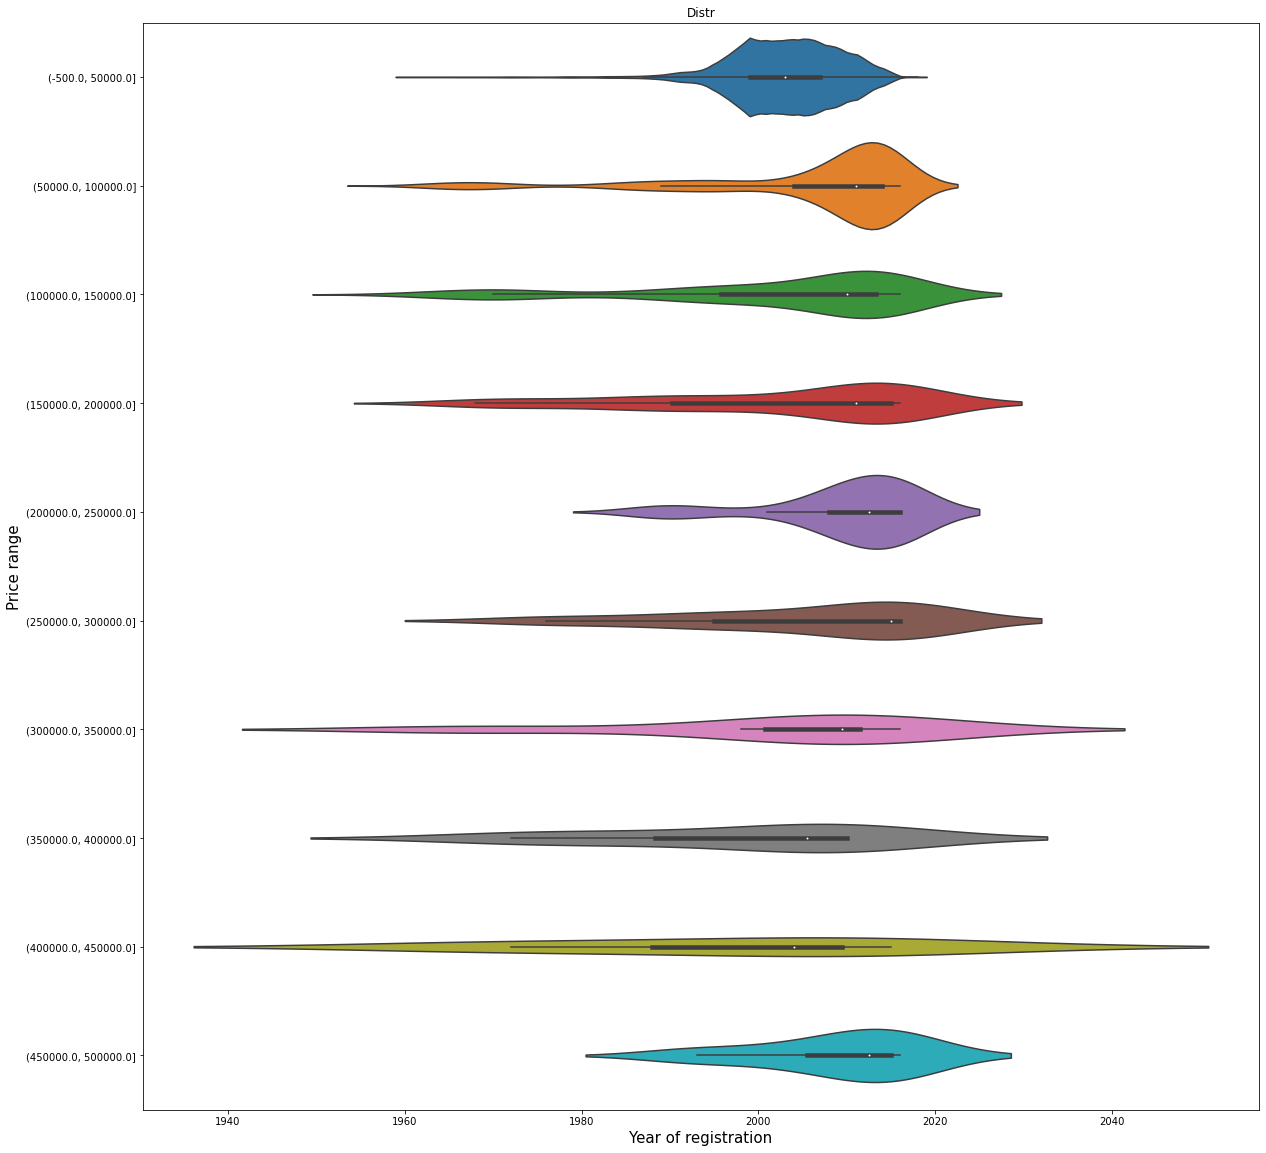

In [11]:
plt.subplots(figsize=(20,20))
plt.title("Distr")
bp = sns.violinplot(x="yearOfRegistration", y="Bin", data=cars)

bp.set_xlabel("Year of registration", fontsize = 15)
bp.set_ylabel("Price range", fontsize = 15)

**Exercise 1.4**

Split the kilometer in 6 bins and create a dataframe where the columns are such bins, and the rows are the different vehicle types. A cell represents the number of cars with the kilometer in the range identified by the column, and the type of vehicle identified by the row.
Create the dataframe in two ways: one by using pivot_table and one by using groupby (obtaining the same results).

In [12]:
cars = pd.read_csv('used_cars_cleaned_dataset.csv')

bins = pd.cut(cars.kilometer, 6)
cars["Bin"] = bins

cars.groupby(["vehicleType", "Bin"]).size().unstack()

Bin,"(4855.0, 29166.667]","(29166.667, 53333.333]","(53333.333, 77500.0]","(77500.0, 101666.667]","(101666.667, 125833.333]","(125833.333, 150000.0]"
vehicleType,,,,,,
andere,230,159,104,242,211,1875
bus,851,1408,1394,2732,2522,19830
cabrio,921,2180,1977,3796,2964,9805
coupe,805,1139,1117,2153,1964,10407
kleinwagen,2842,5708,5085,10630,10275,38645
kombi,1196,2044,1804,4254,4626,48892
limousine,2538,4558,4347,9432,9283,59999
suv,850,1416,1236,1954,1534,7103


In [13]:
cars = pd.read_csv('used_cars_cleaned_dataset.csv')

bins = pd.cut(cars.kilometer, 6)
cars.pivot_table(index=["vehicleType"], columns=[bins], values="price", aggfunc="count", fill_value=0)

kilometer,"(4855.0, 29166.667]","(29166.667, 53333.333]","(53333.333, 77500.0]","(77500.0, 101666.667]","(101666.667, 125833.333]","(125833.333, 150000.0]"
vehicleType,,,,,,
andere,230,159,104,242,211,1875
bus,851,1408,1394,2732,2522,19830
cabrio,921,2180,1977,3796,2964,9805
coupe,805,1139,1117,2153,1964,10407
kleinwagen,2842,5708,5085,10630,10275,38645
kombi,1196,2044,1804,4254,4626,48892
limousine,2538,4558,4347,9432,9283,59999
suv,850,1416,1236,1954,1534,7103


### Exercise 2 - Data Analysis (20 points)

The following graph presents the disk drives sales of Kansas over the year quarters (Q1, Q2, Q3 and Q4). List each of the problems that you detect in the design of this graph. Suggest a solution to each of these problems and create one or more graphs that avoid the identified problems. Please use the data in file named ```exercise2_data.csv``` to populate the new graph.

![title](img/graph1.png)

The first thing that came up in my mind watching this graph is that seems really hard to read and to understand. I cannot figure out why they choose to display values of categorical data with a linechart. Each series suggests that there is a trend across categories, but since we're not talking about time series, this doesn't make any sense. A more reasonable choice would be to draw a linechart of categorical data across quarters. Another big issue is that we cannot compare values of the same category  (e.g. the value of SCSI II Disk Drive 20GB can be retrieved only for Q1 and Q43 because on Q2, Q3 it's covered by the forward series).
Another big issue given by the 3D representation is given by the depth of this graph. If I want to understand which is the value of the two spikes in Q2 I cannot figure how to do it because the reference lines are too far from the graph and thanks to the perspective it's almost impossible to understand the real value.

In [14]:
sales = pd.read_csv('exercise2_data.csv')

sales.Quarter = sales.Quarter.str.strip()
sales.Memory = sales.Memory.str.strip()
sales.ProductType = sales.ProductType.str.strip()

mem_t = sales.Memory.drop_duplicates().tolist()
memory_h = dict(zip(sales.Memory.drop_duplicates().tolist(), range(len(mem_t))))



sales.groupby(["ProductType", "Quarter"]).mean("Value")


Value
ProductType Quarter          
ELISA       Q1       597500.0
            Q2       545000.0
            Q3       515000.0
            Q4       565000.0
Removable   Q1       597500.0
            Q2       545000.0
            Q3       515000.0
            Q4       565000.0
SCSI        Q1       597500.0
            Q2       545000.0
            Q3       515000.0
            Q4       515000.0

In [15]:
import pandas as pd
import numpy as np

from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import Div
from bokeh.palettes import Spectral
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.palettes import Spectral6, RdYlBu
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import brewer
from bokeh.models import ColumnDataSource, Grid, LinearAxis, MultiLine, Plot
from bokeh.models import NumeralTickFormatter
from bokeh.layouts import layout, row, gridplot
output_notebook()


Loading BokehJS ...

In [16]:
def get_product_type_linechart(product_type):
    product_type_data = sales[sales.ProductType == product_type]
    quarters = product_type_data.Quarter.drop_duplicates()
    memory_types = product_type_data["Memory"].drop_duplicates().tolist()
    p = figure( x_range=quarters.tolist(), title="Sales of " + product_type + " disk")
    for m in memory_types:
        p.line(
            x="Quarter",
            y="Value",
            source=ColumnDataSource(sales[(sales.ProductType == product_type) & (sales.Memory == m)]),
            color=RdYlBu[4][memory_h[m]],
            legend_label=m,
        )
    p.yaxis[0].formatter = NumeralTickFormatter(format="$0,0")
    p.legend.title = "Memory size"
    p.xaxis.axis_label = "Quarter"
    p.yaxis.axis_label = "Sales"

    return p

# show(get_product_type_linechart("SCSI"))

Let's represent in a 2D environment the same data of the graph above making a line chart for each product type where the series represents the product's memory type

In [17]:
figure_list = [get_product_type_linechart(pt) for pt in sales.ProductType.drop_duplicates().tolist()]

show(
    gridplot(
        figure_list,
        sizing_mode="stretch_width",
        ncols=2
    ))


And if we also want to compare the product type, a linechart like the below one can be used

In [18]:
def get_product_types_average_linechart():
    product_type_grouped_data = sales.groupby(["ProductType", "Quarter"]).mean("Value").reset_index()
    quarters = product_type_grouped_data.Quarter.drop_duplicates().tolist()
    p = figure( x_range=quarters, title="Average sales of product type")
    product_types = product_type_grouped_data["ProductType"].drop_duplicates().tolist()
    product_types_h = dict(zip(product_types, range(len(product_types))))

    for pt in product_types:
        p.line(
            x="Quarter",
            y="Value",
            source=ColumnDataSource(product_type_grouped_data[product_type_grouped_data.ProductType == pt]),
            color=RdYlBu[4][product_types_h[pt]],
            legend_label=pt,
            line_width=3
        )

    p.yaxis[0].formatter = NumeralTickFormatter(format="$0,0")
    p.legend.title = "Product type"
    p.xaxis.axis_label = "Quarter"
    p.yaxis.axis_label = "Average sales"
    return p



show(get_product_types_average_linechart())

And thanks to this chart, it's immediate that the product type ELISA and the product SCSI have an identical trend. This fact cannot be understood from the 3D model above.

In [19]:
# def get_product_type_linechart_log(product_type):
#     product_type_data = sales[sales.ProductType == product_type]
#     quarters = product_type_data.Quarter.drop_duplicates()
#     memory_types = product_type_data["Memory"].drop_duplicates().tolist()
#     p = figure( x_range=quarters.tolist(), title="Sales of " + product_type + " disk", y_range=(10**1, 10**8), y_axis_type="log")
#     for m in memory_types:
#         p.line(
#             x="Quarter",
#             y="Value",
#             source=ColumnDataSource(sales[(sales.ProductType == product_type) & (sales.Memory == m)]),
#             color=RdYlBu[4][memory_h[m]],
#             legend_label=m,
#         )
#     p.yaxis[0].formatter = NumeralTickFormatter(format="$0,0")
#     p.legend.title = "Memory size"
#     p.xaxis.axis_label = "Quarter"
#     p.yaxis.axis_label = "Sales"

#     return p

# # show(get_product_type_linechart("SCSI"))

# figure_list = [get_product_type_linechart(pt) for pt in sales.ProductType.drop_duplicates().tolist()]

# show(
#     gridplot(
#         figure_list,
#         sizing_mode="stretch_width",
#         ncols=2
#     ))


### Exercise 3 - COVID-19 dataset (50 points)

**Exercise 3.1**: 
- Create a dataframe from the `COVID-19` dataset which shows the data aggregated by country, year and quarter, i.e., a row provides the total number of cases/deaths for a given country-year-quarter.
    - Add a new column to the dataframe which represents the ratio of deaths/cases per country-year-quarter.
    - Which are the top three countries with highest average ratio of deaths/cases over time?

In [20]:
import pandas as pd

covid_cases_df  = pd.read_csv('COVID19_cases.csv', parse_dates=['Date'])
covid_deaths_df = pd.read_csv('COVID19_deaths.csv', parse_dates=['Date'])

covid_cases_df

,Entity,Code,Date,Daily new confirmed cases of COVID-19
0,Afghanistan,AFG,2020-02-24,5.0
1,Afghanistan,AFG,2020-03-07,3.0
2,Afghanistan,AFG,2020-03-11,3.0
3,Afghanistan,AFG,2020-03-14,3.0
4,Afghanistan,AFG,2020-03-15,6.0
...,...,...,...,...
110487,Zimbabwe,ZWE,2022-03-13,446.0
110488,Zimbabwe,ZWE,2022-03-14,394.0
110489,Zimbabwe,ZWE,2022-03-16,741.0
110490,Zimbabwe,ZWE,2022-03-18,362.0


In [21]:
covid_cases_df['Year'] = covid_cases_df.Date.dt.year
covid_cases_df['Quarter'] = covid_cases_df.Date.dt.quarter
# covid_cases_df.set_index(['Entity', 'Year', 'Quarter'], inplace=True)
covid_cases_sum_df = covid_cases_df.groupby(['Entity', 'Year', 'Quarter']).sum()
covid_cases_sum_df

Daily new confirmed cases of COVID-19
Entity      Year Quarter                                       
Afghanistan 2020 1                                        168.0
                 2                                      31279.0
                 3                                       7909.0
                 4                                      12976.0
            2021 1                                       4124.0
...                                                         ...
Zimbabwe    2021 1                                      23015.0
                 2                                      12982.0
                 3                                      80956.0
                 4                                      82438.0
            2022 1                                      31194.0

[1656 rows x 1 columns]

In [22]:
covid_deaths_df['Year'] = covid_deaths_df.Date.dt.year
covid_deaths_df['Quarter'] = covid_deaths_df.Date.dt.quarter
covid_deaths_sum_df = covid_deaths_df.groupby(['Entity', 'Year', 'Quarter']).sum()

In [23]:
# Create a dataframe from the COVID-19 dataset which shows the data aggregated by 
# country, year and quarter, i.e., a row provides the total number of cases/deaths 
# for a given country-year-quarter.

covid_total_df = covid_deaths_sum_df.merge(covid_cases_sum_df, how="outer", left_index=True, right_index=True)
covid_total_df["Ratio"] = covid_total_df["Daily new confirmed deaths due to COVID-19"] / covid_total_df["Daily new confirmed cases of COVID-19"]
covid_total_df = covid_total_df.fillna(0)

The top three countries with highest average ratio of deaths/cases over time

In [24]:
covid_total_df.reset_index()[["Entity", "Ratio"]].groupby(["Entity"]).mean().nlargest(3, columns=["Ratio"])

,Ratio
Entity,
Yemen,0.219209
Vanuatu,0.200000
Sudan,0.104814


If we look at the data of Vanuatu, seems that it's wrong to compute the ratio as the average of the ratios over the quarters, because we're losing information about the other quarters. 

In [25]:
tmp = covid_total_df.reset_index()
tmp[tmp.Entity == "Vanuatu"]

,Entity,Year,Quarter,Daily new confirmed deaths due to COVID-19,Daily new confirmed cases of COVID-19,Ratio
1603,Vanuatu,2020,4,0.0,1.0,0.0
1604,Vanuatu,2021,1,0.0,2.0,0.0
1605,Vanuatu,2021,2,1.0,1.0,1.0
1606,Vanuatu,2021,4,0.0,3.0,0.0
1607,Vanuatu,2022,1,0.0,746.0,0.0


I assume that the request "The top three countries with highest average ratio of deaths/cases over time" it's on the dataset previously created since is a sublist of the previous request. 

In [26]:
# covid_cases_df  = pd.read_csv('COVID19_cases.csv', parse_dates=['Date'])
# covid_deaths_df = pd.read_csv('COVID19_deaths.csv', parse_dates=['Date'])


# covid_cases_df

In [27]:
# all_df = covid_deaths_df.merge(covid_cases_df, how="outer", left_on="Date", right_on="Date")
# all_df = all_df.reset_index()
# all_df = all_df[["Daily new confirmed deaths due to COVID-19", "Daily new confirmed cases of COVID-19", "Date", "Entity"]]
# all_df["Ratio"] = all_df["Daily new confirmed deaths due to COVID-19"] / all_df["Daily new confirmed cases of COVID-19"]
# all_df

- Starting from the previous dataframe, create another one which provides, for each country, the year-quarter with the highest ratio of deaths/cases.
    - Find the year-quarter with maximum ratio of deaths/cases in Switzerland.
    - Find the year-quarter where the ratio of deaths/cases is maximum for the highest number of countries.

In [28]:
# Starting from the previous dataframe, create another one which provides, 
# for each country, the year-quarter with the highest ratio of deaths/cases.

covid_total_max_ratio_df = covid_total_df[covid_total_df.groupby(['Entity'])['Ratio'].transform(max) == covid_total_df["Ratio"]]
covid_total_max_ratio_df = covid_total_max_ratio_df.reset_index().set_index(["Entity"])[["Year", "Quarter", "Ratio"]]
covid_total_max_ratio_df

,Year,Quarter,Ratio
Entity,,,
Afghanistan,2020,3,0.091415
Albania,2020,1,0.061728
Algeria,2020,2,0.065802
Andorra,2020,2,0.083507
Angola,2020,1,0.285714
...,...,...,...
Venezuela,2020,1,0.022222
Vietnam,2020,3,0.048714
Yemen,2020,4,0.353846


In [29]:
#Find the year-quarter with maximum ratio of deaths/cases in Switzerland.
covid_total_max_ratio_df[covid_total_max_ratio_df.index == "Switzerland"]

,Year,Quarter,Ratio
Entity,,,
Switzerland,2020,2,0.08763


In [45]:
#Find the year-quarter where the ratio of deaths/cases is maximum for the highest number of countries.
covid_total_max_ratio_df[["Year", "Quarter"]].value_counts()[:1]

Year  Quarter
2020  2          61
dtype: int64

**Exercise 3.2**: Create an interactive dashboard composed of two tabs using `Bokeh` visualization library and the `COVID-19` dataset. The requirements for each tab are as following:

Tab 1
- Create a map representation for the total number of COVID-19 cases by country.
- You should use the file `ne_110m_admin_0_countries.zip` with polygons that represent the countries and `countries-2alpha-3alpha.csv.zip` with country codes for this exercise.
- Provide a way to interactively filter the data based on date (column Date). The map should be updated accordingly when interacting with the filter.
- The map should be interactive. For instance, on hover the map should show a tooltip with the country name, number of total cases/deaths and time period.


In [31]:
from bokeh.models.widgets import Select, Slider, DateRangeSlider, MultiSelect

from bokeh.layouts import row
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler
from bokeh.models.ranges import Range1d
from bokeh.palettes import Category20c
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook
from bokeh.transform import dodge
from bokeh.transform import factor_cmap
from bokeh.plotting import figure, show, output_notebook, output_file, reset_output
from bokeh.models import ColumnDataSource, CategoricalColorMapper, PrintfTickFormatter, NumeralTickFormatter, Legend, CDSView, GroupFilter, CustomJS, BoxSelectTool, FactorRange
from bokeh.layouts import gridplot, column
from bokeh.models.widgets import Div
from bokeh.palettes import Spectral6, Pastel1, Category20c, Inferno256
from bokeh.layouts import layout
from bokeh.models import Panel, Tabs, FuncTickFormatter, DatetimeTickFormatter

from collections import defaultdict
from scipy import stats
from datetime import datetime as dt

from bokeh.palettes import Reds
from bokeh.models import LinearColorMapper, LogColorMapper, ColorBar
from bokeh.palettes import Reds
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.models import GeoJSONDataSource
import geopandas as gpd


import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Legend, BoxSelectTool, HoverTool
from bokeh.layouts import gridplot, column, widgetbox, row


output_notebook()


Loading BokehJS ...

In [32]:
covid_cases_df = pd.read_csv('COVID19_cases.csv', parse_dates=['Date'])
covid_deaths_df = pd.read_csv('COVID19_deaths.csv', parse_dates=['Date'])

covid_cases_sum_df = covid_cases_df.groupby(['Code', 'Date']).sum()
covid_deaths_sum_df = covid_deaths_df.groupby(['Code', 'Date']).sum()
covid_total_df = covid_deaths_sum_df.merge(covid_cases_sum_df, how="outer", left_index=True, right_index=True)
covid_total_df.reset_index(inplace=True)

covid_total_df

,Code,Date,Daily new confirmed deaths due to COVID-19,Daily new confirmed cases of COVID-19
0,AFG,2020-02-24,NaN,5.0
1,AFG,2020-03-07,NaN,3.0
2,AFG,2020-03-11,NaN,3.0
3,AFG,2020-03-14,NaN,3.0
4,AFG,2020-03-15,NaN,6.0
...,...,...,...,...
111339,ZWE,2022-03-13,2.0,446.0
111340,ZWE,2022-03-14,2.0,394.0
111341,ZWE,2022-03-16,2.0,741.0
111342,ZWE,2022-03-18,2.0,362.0


In [33]:
countries_shp = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
countries_shp = countries_shp[["ADM0_A3", "geometry"]]
first_date = covid_total_df.Date.min()
last_date = covid_total_df.Date.max()

In [34]:
from datetime import datetime

def get_covid_data(min_date, max_date):
    filtered_df = covid_total_df[(covid_total_df.Date >= min_date) & (covid_total_df.Date <= max_date)]
#     print(min_date)
#     print(filtered_df.Date.min())
    
    sum_df = filtered_df[["Code", "Daily new confirmed deaths due to COVID-19", "Daily new confirmed cases of COVID-19"]].groupby(["Code"]).sum()
    sum_df["MinDate"] = filtered_df.groupby(["Code"])["Date"].min().apply(lambda x: x.strftime("%Y-%m-%d"))
    sum_df["MaxDate"] = filtered_df.groupby(["Code"])["Date"].max().apply(lambda x: x.strftime("%Y-%m-%d"))
    sum_df = countries_shp.merge(sum_df, how='left', left_on="ADM0_A3", right_on="Code")
    
    sum_df = sum_df.rename({"Daily new confirmed deaths due to COVID-19": 'TotalDeaths'}, axis=1)
    sum_df = sum_df.rename({"Daily new confirmed cases of COVID-19": 'TotalCases'}, axis=1)
    sum_df = sum_df.rename({"ADM0_A3": 'Code'}, axis=1)
    sum_df = sum_df.fillna("Not provided")
    
    return sum_df.to_json()

# get_covid_data(first_date, last_date)

In [35]:
# Create a map representation for the total number of COVID-19 cases by country.
# You should use the file ne_110m_admin_0_countries.zip with polygons that represent the countries and countries-2alpha-3alpha.csv.zip with country codes for this exercise.
# Provide a way to interactively filter the data based on date (column Date). The map should be updated accordingly when interacting with the filter.
# The map should be interactive. For instance, on hover the map should show a tooltip with the country name, number of total cases/deaths and time period.

def tab_1():

    p = figure(title = 'Covid cases in the world', 
               toolbar_location = 'below',
               tools = "pan, wheel_zoom, box_zoom, reset")

    geo_ds = GeoJSONDataSource(geojson=get_covid_data(first_date, last_date))
    plotted_districts = p.patches('xs','ys', source = geo_ds,
                       line_color = 'black', 
                       line_width = 0.25)

    p.add_tools(HoverTool(renderers = [plotted_districts],
                          tooltips = [
                              ("Code","@Code"), 
                              ("Total deaths", "@TotalDeaths{0,0}"),
                              ("Total cases", "@TotalCases{0,0}"),
                              ("MinDate", "@MinDate{%F}"),
                              ("MaxDate", "@MaxDate{%F}"),
                          ],
                          formatters={
                            '@MaxDate'        : 'datetime',
                            '@MinDate'        : 'datetime',
                          }
                         ))
    
    
    
    date_slider = DateRangeSlider(start=first_date, end=last_date, value=(first_date, last_date),
                    title="Filter date")

    def update_data(attr, old, new):
        min_date = date_slider.value_as_datetime[0]
        max_date = date_slider.value_as_datetime[1]
        geo_ds.geojson = get_covid_data(min_date, max_date)

    date_slider.on_change("value", update_data)

    return gridplot(
        [p, date_slider],
        sizing_mode="stretch_width",
        ncols=1
    )

def wrapper(doc):
     doc.add_root(tab_1())

handler = FunctionHandler(wrapper)
app = Application(handler)
show(app, notebook_url="http://localhost:8888")

Tab 2
- Show a graphical representation that allows exploring the total number of cases over time bucketed by week.
- The graph should compare the number of cases over time grouped by week for the following three countries: Italy, Spain and France.
- Provide tooltips whenever appropriate i.e., the total number of cases/deaths of the week.
- How similar is the trend of these three countries? What are the main differences in the trend?

In [36]:
covid_cases_df = pd.read_csv('COVID19_cases.csv', parse_dates=['Date'])
covid_deaths_df = pd.read_csv('COVID19_deaths.csv', parse_dates=['Date'])

covid_cases_sum_df = covid_cases_df.groupby(['Code', 'Date']).sum()
covid_deaths_sum_df = covid_deaths_df.groupby(['Code', 'Date']).sum()
covid_total_df = covid_deaths_sum_df.merge(covid_cases_sum_df, how="outer", left_index=True, right_index=True)
covid_total_df.reset_index(inplace=True)

covid_total_df

,Code,Date,Daily new confirmed deaths due to COVID-19,Daily new confirmed cases of COVID-19
0,AFG,2020-02-24,NaN,5.0
1,AFG,2020-03-07,NaN,3.0
2,AFG,2020-03-11,NaN,3.0
3,AFG,2020-03-14,NaN,3.0
4,AFG,2020-03-15,NaN,6.0
...,...,...,...,...
111339,ZWE,2022-03-13,2.0,446.0
111340,ZWE,2022-03-14,2.0,394.0
111341,ZWE,2022-03-16,2.0,741.0
111342,ZWE,2022-03-18,2.0,362.0


In [37]:
from datetime import datetime

def get_covid_data(min_date, max_date):
    filtered_df = covid_total_df[(covid_total_df.Date >= min_date) & (covid_total_df.Date <= max_date)]
    sum_df = filtered_df[["Code", "Daily new confirmed deaths due to COVID-19", "Daily new confirmed cases of COVID-19"]].groupby(["Code"]).sum()
    sum_df["MinDate"] = filtered_df.groupby(["Code"])["Date"].min().apply(lambda x: x.strftime("%Y-%m-%d"))
    sum_df["MaxDate"] = filtered_df.groupby(["Code"])["Date"].max().apply(lambda x: x.strftime("%Y-%m-%d"))
    sum_df = countries_shp.merge(sum_df, how='left', left_on="ADM0_A3", right_on="Code")
    
    
    sum_df = sum_df.rename({"Daily new confirmed deaths due to COVID-19": 'TotalDeaths'}, axis=1)
    sum_df = sum_df.rename({"Daily new confirmed cases of COVID-19": 'TotalCases'}, axis=1)
    sum_df = sum_df.rename({"ADM0_A3": 'Code'}, axis=1)
    sum_df = sum_df.fillna("Not provided").to_json()
    
    return sum_df

# get_covid_data(first_date, last_date)


'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"Code": "FJI", "MaxDate": "2022-03-18", "MinDate": "2020-03-19", "TotalCases": 64221.0, "TotalDeaths": 836.0}, "geometry": {"type": "MultiPolygon", "coordinates": [[[[180.0, -16.067132663642447], [180.0, -16.555216566639196], [179.36414266196414, -16.801354076946883], [178.72505936299711, -17.01204167436804], [178.59683859511713, -16.639150000000004], [179.0966093629971, -16.433984277547403], [179.4135093629971, -16.379054277547404], [180.0, -16.067132663642447]]], [[[178.12557, -17.50481], [178.3736, -17.33992], [178.71806, -17.62846], [178.55271, -18.15059], [177.93266000000003, -18.28799], [177.38146, -18.16432], [177.28504, -17.72465], [177.67087, -17.381140000000002], [178.12557, -17.50481]]], [[[-179.79332010904864, -16.020882256741224], [-179.9173693847653, -16.501783135649397], [-180.0, -16.555216566639196], [-180.0, -16.067132663642447], [-179.79332010904864, -16.020882256741224]]]]}}, {"

In [38]:
covid_total_tab2 = covid_total_df
covid_total_tab2['Week'] = covid_total_tab2.Date.dt.isocalendar().week
covid_total_tab2['Year'] = covid_total_tab2.Date.dt.isocalendar().year
covid_total_tab2 = covid_total_tab2[covid_total_tab2.Code.isin(['ITA', "ESP", "FRA"])]
covid_total_tab2 = covid_total_tab2.rename({"Daily new confirmed deaths due to COVID-19": 'TotalDeaths'}, axis=1)
covid_total_tab2 = covid_total_tab2.rename({"Daily new confirmed cases of COVID-19": 'TotalCases'}, axis=1)



covid_bucketed_df = covid_total_tab2.groupby(["Code", "Year", "Week"]).sum()
covid_bucketed_df["LastDate"] = covid_total_tab2.groupby(["Code", "Year", "Week"])["Date"].max()
covid_bucketed_df = covid_bucketed_df.reset_index()
covid_bucketed_df

,Code,Year,Week,TotalDeaths,TotalCases,LastDate
0,ESP,2020,5,0.0,1.0,2020-02-01
1,ESP,2020,6,0.0,1.0,2020-02-09
2,ESP,2020,9,0.0,82.0,2020-03-01
3,ESP,2020,10,17.0,589.0,2020-03-08
4,ESP,2020,11,272.0,7125.0,2020-03-15
...,...,...,...,...,...,...
328,ITA,2022,7,1974.0,364300.0,2022-02-20
329,ITA,2022,8,1571.0,294583.0,2022-02-27
330,ITA,2022,9,1327.0,261554.0,2022-03-06
331,ITA,2022,10,981.0,347095.0,2022-03-13


In [39]:
countries = covid_bucketed_df["Code"].drop_duplicates().tolist()
countries = dict(zip(countries, range(len(countries))))
countries

{'ESP': 0, 'FRA': 1, 'ITA': 2}

In [40]:
covid_bucket_id = covid_total_df[["Year", "Week"]]
covid_bucket_id = covid_bucket_id.drop_duplicates().sort_values(by=["Year", "Week"]).reset_index().reset_index()
covid_bucket_id = covid_bucket_id.rename({"level_0": 'WeekBucket'}, axis=1)
covid_bucket_id = covid_bucket_id[["Year", "Week", "WeekBucket"]]
covid_bucket_id.WeekBucket += 1


covid_bucket_id

,Year,Week,WeekBucket
0,2020,4,1
1,2020,5,2
2,2020,6,3
3,2020,7,4
4,2020,8,5
...,...,...,...
108,2022,7,109
109,2022,8,110
110,2022,9,111
111,2022,10,112


In [41]:
covid_bucketed_df = covid_bucketed_df.merge(covid_bucket_id, left_on=["Week", "Year"], right_on=["Week", "Year"])
covid_bucketed_df = covid_bucketed_df.sort_values("WeekBucket")

In [42]:
min_date = covid_bucketed_df.LastDate.min()
min_date

Timestamp('2020-01-25 00:00:00')

In [43]:
def tab_2():
    p = figure(title="Covid cases by week")

    for code in countries:
        p.line(
            x="WeekBucket",
            y="TotalCases",
            source=ColumnDataSource(covid_bucketed_df[covid_bucketed_df.Code == code]),
            color=RdYlBu[4][countries[code]],
            legend_label=code,
            line_width=3
        )
        
        p.circle(
            x="WeekBucket",
            y="TotalCases",
            source=ColumnDataSource(covid_bucketed_df[covid_bucketed_df.Code == code]),
            color=RdYlBu[4][countries[code]],
            legend_label=code,
            size=6
        )

        
    p.legend.title = "Country"
    p.xaxis.axis_label = "Week bin number (bins starting from " + min_date.strftime("%Y-%m-%d") + ")"
    p.yaxis.axis_label = "Total number of cases"
#     p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")
    p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")

    
    p.add_tools(HoverTool(
        tooltips=[
            ("Code", "@Code"),
            ("Number of cases", "@TotalCases{0,0}"),
            ("Number of deaths", "@TotalDeaths{0,0}"),
            ("Year", "@Year"),
            ("Week", "@Week"),
            ("Last date of the week", "@LastDate{%F}"),
            ("Week bin number", "@WeekBucket"),
        ],

        formatters={
            '@LastDate'        : 'datetime',
        }
    ))
    return gridplot(
        [p],
        sizing_mode="stretch_width",
        ncols=1
    )

def wrapper(doc):
     doc.add_root(tab_2())

handler = FunctionHandler(wrapper)
app = Application(handler)
show(app, notebook_url="http://localhost:8888")

The trend of these countries is very similar in the first third of the bins (until the 40th bin). In general, all the three countries have a wave in the same period. We can notice a wave around the 12th bin (April 2020); another wave on the 42nd bin (November 2020), with a spike for France higher than the one of Italy and Spain. At that moment, the number of cases in France is more than double the cases in Spain. 

Generally speaking, the trend for these countries is similar but different in the number of cases. For example, in France, cases are almost always higher than in Spain and Italy. The main differences between them are sometimes the number of cases and the timing of when the wave takes place (i.e., Spain, around the 53rd bin, registered a wave before Italy and France reported it, respectively, in the 60th and 63rd bin). 




In [44]:
from bokeh.models import Panel, Tabs


def wrapper(doc):
    tab1 = Panel(child=tab_1(), title="Map")
    tab2 = Panel(child=tab_2(), title="Trend")
    tabs = Tabs(tabs=[ tab1, tab2 ])
    doc.add_root(tabs)
        
handler = FunctionHandler(wrapper)
app = Application(handler)
show(app, notebook_url="http://localhost:8888" )